# Using the `steiner_ellipse.py` module

## Steiner algorithm
The **Steiner algorithm** is used to find the smallest that encloses three given points: 
$\vec{p}_1$, $\vec{p}_2$ and $\vec{p}_3$.
This minimal enclosing ellipse is known as the *Steiner ellipse*, and it is centered at the 
**centroid** of the triangle formed by these three points.

In this notebook, we will implement the Steiner algorithm to find the enclosing ellipse and 
visualize it. 

The centroid $\vec{p}$ of the ellipse is calculated as the average of the three input points, 
ensuring that the ellipse is symmetrically centered with respect to these points. 
The resulting ellipse is the smallest possible ellipse that passes through the given points.

For further details on the mathematical formulation and properties of the Steiner ellipse, you can 
refer to its [Wikipedia page](https://en.wikipedia.org/wiki/Steiner_ellipse).

---

## Matrix definition of an ellipse
An ellipse can be defined with
$(\vec{u} - \vec{p})^\dag \cdot D \cdot (\vec{u} - \vec{p}) \leq 1$
where $\vec{p}$ is the center of the ellipse and $D$ is its matrix definition.
All the points $\vec{u}$ that verify this equation are inside the ellipse.

## Steiner algorithm implementation
This module contains four key functions for working with ellipses:

1. **`steiner_ellipse_def()`**:  
   This function implements the **Steiner algorithm** to find the smallest ellipse that encloses the three input points. It returns the matrix definition of the ellipse, which can be used to describe the ellipse mathematically. The returned result includes:
   - **D**: The matrix that defines the ellipse.
   - **p**: The center of the ellipse.

2. **`plot_ellipse()`**:  
   This function plots an ellipse using its matrix definition and its center.

3. **`is_inside_ellipse()`**:  
   This function checks whether a given point lies inside the ellipse.
   It accepts either a single point or an array of points and returns a boolean value indicating if each point is inside the ellipse.

4. **`ellipse_bbox()`**:  
   This function finds the bounding box of an ellipse.
   It returns the minimum and maximum values reached by the ellipse for each dimension.

### Usage example
The following cells in this notebook demonstrate how to use the `steiner_ellipse_def()` function to compute the smallest enclosing ellipse for three points.
The `plot_ellipse()` function is then used to plot the computed ellipse.
Additionally, this notebook present how to verify if points are inside the ellipse using the `is_inside_ellipse()` function and how to find the bounding box of an ellipse using `ellipse_bbox()`.

Import the required packages and the 'steiner_ellipse_def()' function.

In [1]:
# Import the required packages
import matplotlib.pyplot as plt
import numpy as np

# Import the Steiner function
import steiner_ellipse as se

Define the three point for which to fin the smallest ellipse.

In [2]:
p1 = (1, 0)
p2 = (0, 1)
p3 = (1, 1)

Compute the ellipse definition and print it.

D: matrix definition

p: center of the ellipse

In [3]:
D, p = se.steiner_ellipse_def(p1, p2, p3)

print("D matrix:")
print(D)
print("\nCenter of the ellipse:")
print(p)

D matrix:
[[3.  1.5]
 [1.5 3. ]]

Center of the ellipse:
[0.66666667 0.66666667]


Plot the resulting ellipse. The first argument is the matrix definition of the ellipse and the second is its center.
Points can be passed as third argument (optional).
The function will plot them in cyan if they are inside the ellipse or in magenta if they are not.
For this example, we used the points defining the ellipse and the origin.

Other than the points, the figure includes the center of the ellipse (blue star) and its bounding box (green cadre).

(2, 2)
False
(2, 2)
False


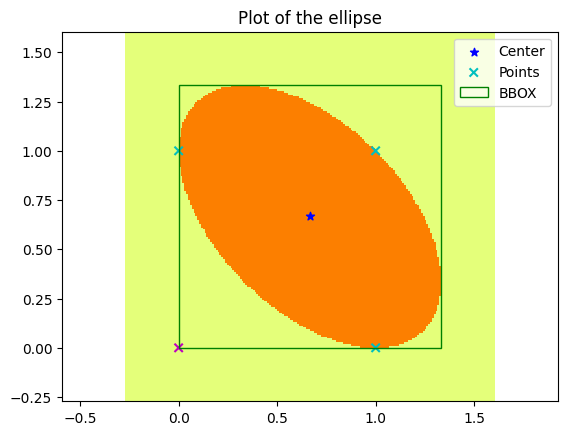

In [4]:
points_to_plot = [p1, p2, p3, (0, 0)]
se.plot_ellipse(D, p, points_to_plot)

The `plot_ellipse()` function uses the `is_inside_ellipse`() function to determine wether a point is inside the ellipse or not and decide its color.
The first argument is the list of point which may have any shape as long as the last dimension is of the same size as the ellipse (2D in our case).
The second and third arguments are the ellipse matrix definition and center respectively.
The function returns a boolean array specifying wether the points are inside the ellipse.

In [5]:
# List of points to test
points_to_test = [p1, p2, p3, (0, 0)]
print(f"{points_to_test=}")

# Determine which points are inside the ellipse
points_inside = se.is_inside_ellipse(points_to_test, D, p)
print(f"{points_inside=}")

points_to_test=[(1, 0), (0, 1), (1, 1), (0, 0)]
(2, 2)
False
points_inside=array([ True,  True,  True, False])


The `plot_ellipse()` function also uses the `ellipse_bbox()` function to find the bounding box of the ellipse.
Its arguments are the array definition and center of the ellipse.
It returns an array of shape (n_dim, 2), where n_dim is the number of dimensions of the ellipse.
The first index corresponds to each spatial dimension (e.g., x, y, ...), and the second index contains the minimum and maximum bounds along that dimension.

In [6]:
bbox = se.ellipse_bbox(D, p)
print("Bounding box of the ellipse:")
print(bbox)

Bounding box of the ellipse:
[[-1.11022302e-16  1.33333333e+00]
 [ 0.00000000e+00  1.33333333e+00]]
